## STEP 1 : WE WANT TO DO A CRWALING FROM WEBSITE : https://tribuna.com/en/ 

We will do a crwaling on eache league in different country. 

In [1]:

import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (10, 6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import metrics
from scipy.special import expit
from scipy.special import logit

import re

from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error





# We'll take English Leagues data for 10 years   

In [2]:
base_url = "https://tribuna.com/en/league/epl/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_england = []
brunch_name_england = []
brunch_match_england = []
brunch_win_england = []
brunch_draw_england = []
brunch_loses_england = []
brunch_goal_host_england = []
brunch_goal_guest_england = []
brunch_points_england = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_england.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_england.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_england.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_england.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_england.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_england.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_england.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_england.append(rank)





In [3]:
import pandas as pd
NAME = 'Premier League'

df = pd.DataFrame({'TEAM':brunch_name_england, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_england, 'WINS': brunch_win_england, 'DRWA' : brunch_draw_england, 
                  'LOSE': brunch_loses_england, 'GOAL HOST': brunch_goal_host_england,  'POINTS':brunch_points_england, 'RANK' : brunch_np_england})

df


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
235,Everton,Premier League,2021-2022/,38,11,6,21,43/66,39,16
236,Leeds United,Premier League,2021-2022/,38,9,11,18,42/79,38,17
237,Burnley,Premier League,2021-2022/,38,7,14,17,34/53,35,18
238,Watford,Premier League,2021-2022/,38,6,5,27,34/77,23,19


In [4]:
base_url = "https://tribuna.com/en/league/championship/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Champ = []
brunch_name_Champ = []
brunch_match_Champ = []
brunch_win_Champ = []
brunch_draw_Champ = []
brunch_loses_Champ = []
brunch_goal_host_Champ = []
brunch_goal_guest_Champ = []
brunch_points_Champ = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Champ.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Champ.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Champ.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Champ.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Champ.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Champ.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Champ.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Champ.append(rank)





In [5]:
import pandas as pd
NAME = 'Championship'

df1 = pd.DataFrame({'TEAM':brunch_name_Champ, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Champ, 'WINS': brunch_win_Champ, 'DRWA' : brunch_draw_Champ, 
                  'LOSE': brunch_loses_Champ, 'GOAL HOST': brunch_goal_host_Champ,  'POINTS':brunch_points_Champ, 'RANK' : brunch_np_Champ})

df1


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Queens Park Rangers,Championship,2010-2011/,46,24,16,6,71/32,88,1
1,Norwich City,Championship,2010-2011/,46,23,15,8,83/58,84,2
2,Swansea City,Championship,2010-2011/,46,24,8,14,69/42,80,3
3,Cardiff City,Championship,2010-2011/,46,23,11,12,76/54,80,4
4,Reading,Championship,2010-2011/,46,20,17,9,77/51,77,5
...,...,...,...,...,...,...,...,...,...,...
283,Birmingham City,Championship,2021-2022/,46,11,14,21,50/75,47,20
284,Reading,Championship,2021-2022/,46,13,8,25,54/87,41,21
285,Peterborough United,Championship,2021-2022/,46,9,10,27,43/87,37,22
286,Derby County,Championship,2021-2022/,46,14,13,19,45/53,34,23


In [6]:
base_url = "https://tribuna.com/en/league/league-one/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_One = []
brunch_name_One = []
brunch_match_One = []
brunch_win_One = []
brunch_draw_One = []
brunch_loses_One = []
brunch_goal_host_One = []
brunch_goal_guest_One = []
brunch_points_One = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_One.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_One.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_One.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_One.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_One.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_One.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_One.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_One.append(rank)





In [7]:
import pandas as pd
NAME = 'League One'

df2 = pd.DataFrame({'TEAM':brunch_name_One, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_One, 'WINS': brunch_win_One, 'DRWA' : brunch_draw_One, 
                  'LOSE': brunch_loses_One, 'GOAL HOST': brunch_goal_host_One,  'POINTS':brunch_points_One,'RANK' : brunch_np_One })

df2


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Brighton and Hove Albion,League One,2010-2011/,46,28,11,7,85/40,95,1
1,Southampton,League One,2010-2011/,46,28,8,10,86/38,92,2
2,Huddersfield Town,League One,2010-2011/,46,25,12,9,77/48,87,3
3,Peterborough United,League One,2010-2011/,46,23,10,13,106/75,79,4
4,Milton Keynes Dons,League One,2010-2011/,46,23,8,15,67/60,77,5
...,...,...,...,...,...,...,...,...,...,...
283,Fleetwood Town,League One,2021-2022/,46,8,16,22,62/82,40,20
284,Gillingham,League One,2021-2022/,46,8,16,22,35/69,40,21
285,Doncaster Rovers,League One,2021-2022/,46,10,8,28,37/82,38,22
286,AFC Wimbledon,League One,2021-2022/,46,6,19,21,49/75,37,23


## This Is The Data Frame For All England Leagues :

In [8]:
pandas = [df,df1,df2]
result_england = pd.concat(pandas)
result_england['MATCHES'] = result_england['MATCHES'].astype('int')
result_england['WINS'] = result_england['WINS'].astype('int')
result_england['DRWA'] = result_england['DRWA'].astype('int')
result_england['LOSE'] = result_england['LOSE'].astype('int')
result_england['POINTS'] = result_england['POINTS'].astype('int')
result_england['RANK'] = result_england['RANK'].astype('int')
result_england.to_excel("ALL_Leagues_OF_England.xlsx")
result_england


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
283,Fleetwood Town,League One,2021-2022/,46,8,16,22,62/82,40,20
284,Gillingham,League One,2021-2022/,46,8,16,22,35/69,40,21
285,Doncaster Rovers,League One,2021-2022/,46,10,8,28,37/82,38,22
286,AFC Wimbledon,League One,2021-2022/,46,6,19,21,49/75,37,23


# We'll take Spain Leagues data for 10 years

In [9]:
base_url = "https://tribuna.com/en/league/la-liga/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Spain = []
brunch_name_Spain = []
brunch_match_Spain = []
brunch_win_Spain = []
brunch_draw_Spain = []
brunch_loses_Spain = []
brunch_goal_host_Spain = []
brunch_goal_guest_Spain = []
brunch_points_Spain = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Spain.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Spain.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Spain.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Spain.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Spain.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Spain.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Spain.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Spain.append(rank)




In [10]:
import pandas as pd
NAME = 'La Liga'

df3 = pd.DataFrame({'TEAM':brunch_name_Spain, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Spain, 'WINS': brunch_win_Spain, 'DRWA' : brunch_draw_Spain, 
                  'LOSE': brunch_loses_Spain, 'GOAL HOST': brunch_goal_host_Spain,  'POINTS':brunch_points_Spain, 'RANK' : brunch_np_Spain})

df3


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Barcelona,La Liga,2010-2011/,38,30,6,2,95/21,96,1
1,Real Madrid,La Liga,2010-2011/,38,29,5,4,102/33,92,2
2,Valencia,La Liga,2010-2011/,38,21,8,9,64/44,71,3
3,Villarreal,La Liga,2010-2011/,38,18,8,12,54/44,62,4
4,Atletico Madrid,La Liga,2010-2011/,38,17,7,14,62/53,58,5
...,...,...,...,...,...,...,...,...,...,...
235,Mallorca,La Liga,2021-2022/,38,10,9,19,36/63,39,16
236,Cadiz,La Liga,2021-2022/,38,8,15,15,35/51,39,17
237,Granada,La Liga,2021-2022/,38,8,14,16,44/61,38,18
238,Levante,La Liga,2021-2022/,38,8,11,19,51/76,35,19


In [11]:
base_url = "https://tribuna.com/en/league/la-liga-2/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_SpainB = []
brunch_name_SpainB = []
brunch_match_SpainB = []
brunch_win_SpainB = []
brunch_draw_SpainB = []
brunch_loses_SpainB = []
brunch_goal_host_SpainB = []
brunch_goal_guest_SpainB = []
brunch_points_SpainB = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_SpainB.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_SpainB.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_SpainB.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_SpainB.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_SpainB.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_SpainB.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_SpainB.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_SpainB.append(rank)





In [12]:
import pandas as pd
NAME = 'La Liga 2'

df4 = pd.DataFrame({'TEAM':brunch_name_SpainB, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_SpainB, 'WINS': brunch_win_SpainB, 'DRWA' : brunch_draw_SpainB, 
                  'LOSE': brunch_loses_SpainB, 'GOAL HOST': brunch_goal_host_SpainB,  'POINTS':brunch_points_SpainB,  'RANK' : brunch_np_SpainB})

df4


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Betis,La Liga 2,2010-2011/,42,25,8,9,85/44,83,1
1,Rayo Vallecano,La Liga 2,2010-2011/,42,23,10,9,73/48,79,2
2,Barcelona B,La Liga 2,2010-2011/,42,20,11,11,85/62,71,3
3,Elche,La Liga 2,2010-2011/,42,18,15,9,55/42,69,4
4,Granada,La Liga 2,2010-2011/,42,18,14,10,71/47,68,5
...,...,...,...,...,...,...,...,...,...,...
259,Málaga,La Liga 2,2021-2022/,42,11,12,19,36/57,45,18
260,SD Amorebieta,La Liga 2,2021-2022/,42,9,16,17,44/63,43,19
261,Real Sociedad B,La Liga 2,2021-2022/,42,10,10,22,43/61,40,20
262,Fuenlabrada,La Liga 2,2021-2022/,42,6,15,21,39/65,33,21


In [13]:
base_url = "https://tribuna.com/en/league/second-division-b/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_SpainDIVB = []
brunch_name_SpainDIVB = []
brunch_match_SpainDIVB = []
brunch_win_SpainDIVB = []
brunch_draw_SpainDIVB = []
brunch_loses_SpainDIVB = []
brunch_goal_host_SpainDIVB = []
brunch_goal_guest_SpainDIVB = []
brunch_points_SpainDIVB = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_SpainDIVB.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_SpainDIVB.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_SpainDIVB.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_SpainDIVB.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_SpainDIVB.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_SpainDIVB.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_SpainDIVB.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_SpainDIVB.append(rank)





In [14]:
import pandas as pd
NAME = 'Second Division B'

df5 = pd.DataFrame({'TEAM':brunch_name_SpainDIVB, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_SpainDIVB, 'WINS': brunch_win_SpainDIVB, 'DRWA' : brunch_draw_SpainDIVB, 
                  'LOSE': brunch_loses_SpainDIVB, 'GOAL HOST': brunch_goal_host_SpainDIVB,  'POINTS':brunch_points_SpainDIVB, 'RANK' : brunch_np_SpainDIVB})

df5


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Eibar,Second Division B,2010-2011/,38,21,10,7,58/32,73,1
1,Real Murcia,Second Division B,2010-2011/,38,24,10,4,68/21,82,1
2,CD Lugo,Second Division B,2010-2011/,38,22,9,7,64/39,75,1
3,CE Sabadell,Second Division B,2010-2011/,38,19,12,7,42/24,69,1
4,Sevilla Atletico,Second Division B,2010-2011/,38,21,11,6,82/40,74,2
...,...,...,...,...,...,...,...,...,...,...
1040,UCAM Murcia,Second Division B,2021-2022/,38,8,11,19,42/56,35,18
1041,CD Tudelano,Second Division B,2021-2022/,38,7,7,24,33/54,28,19
1042,UE Llagostera,Second Division B,2021-2022/,38,6,15,17,26/51,33,19
1043,UD Extremadura,Second Division B,2021-2022/,38,5,5,28,22/80,0,20


## This Is The Data Frame For All Spain Leagues :

In [15]:
pandas = [df3,df4,df5]
result_Spain = pd.concat(pandas)
result_Spain['MATCHES'] = result_Spain['MATCHES'].astype('int')
result_Spain['WINS'] = result_Spain['WINS'].astype('int')
result_Spain['DRWA'] = result_Spain['DRWA'].astype('int')
result_Spain['LOSE'] = result_Spain['LOSE'].astype('int')
result_Spain['POINTS'] = result_Spain['POINTS'].astype('int')
result_Spain['RANK'] = result_Spain['RANK'].astype('int')
result_Spain.to_excel("Leagues_of_Spain.xlsx")
result_Spain



,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Barcelona,La Liga,2010-2011/,38,30,6,2,95/21,96,1
1,Real Madrid,La Liga,2010-2011/,38,29,5,4,102/33,92,2
2,Valencia,La Liga,2010-2011/,38,21,8,9,64/44,71,3
3,Villarreal,La Liga,2010-2011/,38,18,8,12,54/44,62,4
4,Atletico Madrid,La Liga,2010-2011/,38,17,7,14,62/53,58,5
...,...,...,...,...,...,...,...,...,...,...
1040,UCAM Murcia,Second Division B,2021-2022/,38,8,11,19,42/56,35,18
1041,CD Tudelano,Second Division B,2021-2022/,38,7,7,24,33/54,28,19
1042,UE Llagostera,Second Division B,2021-2022/,38,6,15,17,26/51,33,19
1043,UD Extremadura,Second Division B,2021-2022/,38,5,5,28,22/80,0,20


# We'll take Germany League data for 10 years

In [16]:
base_url = "https://tribuna.com/en/league/bundesliga/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Germany = []
brunch_name_Germany = []
brunch_match_Germany = []
brunch_win_Germany = []
brunch_draw_Germany = []
brunch_loses_Germany = []
brunch_goal_host_Germany = []
brunch_goal_guest_Germany = []
brunch_points_Germany = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Germany.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Germany.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Germany.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Germany.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Germany.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Germany.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Germany.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Germany.append(rank)





In [17]:
import pandas as pd
NAME = 'Bundesliga'

df6 = pd.DataFrame({'TEAM':brunch_name_Germany, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Germany, 'WINS': brunch_win_Germany, 'DRWA' : brunch_draw_Germany, 
                  'LOSE': brunch_loses_Germany, 'GOAL HOST': brunch_goal_host_Germany,  'POINTS':brunch_points_Germany, 'RANK' : brunch_np_Germany})

df6


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Borussia Dortmund,Bundesliga,2010-2011/,34,23,6,5,67/22,75,1
1,Bayer Leverkusen,Bundesliga,2010-2011/,34,20,8,6,64/44,68,2
2,FC Bayern,Bundesliga,2010-2011/,34,19,8,7,81/40,65,3
3,Hannover 96,Bundesliga,2010-2011/,34,19,3,12,49/45,60,4
4,Mainz 05,Bundesliga,2010-2011/,34,18,4,12,52/39,58,5
...,...,...,...,...,...,...,...,...,...,...
211,Augsburg,Bundesliga,2021-2022/,34,10,8,16,39/56,38,14
212,Stuttgart,Bundesliga,2021-2022/,34,7,12,15,41/59,33,15
213,Hertha BSC,Bundesliga,2021-2022/,34,9,6,19,37/71,33,16
214,Arminia Bielefeld,Bundesliga,2021-2022/,34,5,13,16,27/53,28,17


In [18]:
base_url = "https://tribuna.com/en/league/2nd-bundesliga/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Germany2 = []
brunch_name_Germany2 = []
brunch_match_Germany2 = []
brunch_win_Germany2 = []
brunch_draw_Germany2 = []
brunch_loses_Germany2 = []
brunch_goal_host_Germany2 = []
brunch_goal_guest_Germany2 = []
brunch_points_Germany2 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Germany2.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Germany2.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Germany2.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Germany2.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Germany2.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Germany2.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Germany2.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Germany2.append(rank)





In [19]:
import pandas as pd
NAME = '2.Bundesliga'

df7 = pd.DataFrame({'TEAM':brunch_name_Germany2, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Germany2, 'WINS': brunch_win_Germany2, 'DRWA' : brunch_draw_Germany2, 
                  'LOSE': brunch_loses_Germany2, 'GOAL HOST': brunch_goal_host_Germany2,  'POINTS':brunch_points_Germany2,  'RANK' : brunch_np_Germany2})

df7


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Hertha BSC,2.Bundesliga,2010-2011/,34,23,5,6,69/28,74,1
1,Augsburg,2.Bundesliga,2010-2011/,34,19,8,7,58/27,65,2
2,Bochum,2.Bundesliga,2010-2011/,34,20,5,9,49/35,65,3
3,Greuther Furth,2.Bundesliga,2010-2011/,34,17,10,7,47/27,61,4
4,Erzgebirge Aue,2.Bundesliga,2010-2011/,34,16,8,10,40/37,56,5
...,...,...,...,...,...,...,...,...,...,...
211,SV Sandhausen,2.Bundesliga,2021-2022/,34,10,11,13,42/54,41,14
212,SSV Jahn Regensburg,2.Bundesliga,2021-2022/,34,10,10,14,50/51,40,15
213,SG Dynamo Dresden,2.Bundesliga,2021-2022/,34,7,11,16,33/46,32,16
214,Erzgebirge Aue,2.Bundesliga,2021-2022/,34,6,8,20,32/72,26,17


In [20]:
base_url = "https://tribuna.com/en/league/3rd-liga/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Germany3 = []
brunch_name_Germany3 = []
brunch_match_Germany3 = []
brunch_win_Germany3 = []
brunch_draw_Germany3 = []
brunch_loses_Germany3 = []
brunch_goal_host_Germany3 = []
brunch_goal_guest_Germany3 = []
brunch_points_Germany3 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Germany3.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Germany3.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Germany3.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Germany3.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Germany3.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Germany3.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Germany3.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Germany3.append(rank)





In [21]:
import pandas as pd
NAME = '3.Bundesliga'

df8 = pd.DataFrame({'TEAM':brunch_name_Germany3, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Germany3, 'WINS': brunch_win_Germany3, 'DRWA' : brunch_draw_Germany3, 
                  'LOSE': brunch_loses_Germany3, 'GOAL HOST': brunch_goal_host_Germany3,  'POINTS':brunch_points_Germany3,  'RANK' : brunch_np_Germany3})

df8


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Eintracht Braunschweig,3.Bundesliga,2010-2011/,38,26,7,5,81/22,85,1
1,Hansa Rostock,3.Bundesliga,2010-2011/,38,24,6,8,70/36,78,2
2,SG Dynamo Dresden,3.Bundesliga,2010-2011/,38,19,8,11,55/37,65,3
3,SV Wehen Wiesbaden,3.Bundesliga,2010-2011/,38,18,10,10,55/39,64,4
4,FC Rot-Weiss Erfurt,3.Bundesliga,2010-2011/,38,18,7,13,63/45,61,5
...,...,...,...,...,...,...,...,...,...,...
235,SC Verl,3.Bundesliga,2021-2022/,36,10,10,16,56/66,40,16
236,FC Viktoria 1889 Berlin,3.Bundesliga,2021-2022/,36,10,7,19,44/62,37,17
237,FC Wurzburger Kickers,3.Bundesliga,2021-2022/,36,7,9,20,34/59,30,18
238,TSV Havelse,3.Bundesliga,2021-2022/,36,5,8,23,28/71,23,19


## This Is The Data Frame For All Germany Leagues :

In [22]:
pandas = [df6,df7,df8]
result_Germany = pd.concat(pandas)
result_Germany['MATCHES'] = result_Germany['MATCHES'].astype('int')
result_Germany['WINS'] = result_Germany['WINS'].astype('int')
result_Germany['DRWA'] = result_Germany['DRWA'].astype('int')
result_Germany['LOSE'] = result_Germany['LOSE'].astype('int')
result_Germany['POINTS'] = result_Germany['POINTS'].astype('int')
result_Germany['RANK'] = result_Germany['RANK'].astype('int')
result_Germany.to_excel("Leagues_of_Germany.xlsx")
result_Germany

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Borussia Dortmund,Bundesliga,2010-2011/,34,23,6,5,67/22,75,1
1,Bayer Leverkusen,Bundesliga,2010-2011/,34,20,8,6,64/44,68,2
2,FC Bayern,Bundesliga,2010-2011/,34,19,8,7,81/40,65,3
3,Hannover 96,Bundesliga,2010-2011/,34,19,3,12,49/45,60,4
4,Mainz 05,Bundesliga,2010-2011/,34,18,4,12,52/39,58,5
...,...,...,...,...,...,...,...,...,...,...
235,SC Verl,3.Bundesliga,2021-2022/,36,10,10,16,56/66,40,16
236,FC Viktoria 1889 Berlin,3.Bundesliga,2021-2022/,36,10,7,19,44/62,37,17
237,FC Wurzburger Kickers,3.Bundesliga,2021-2022/,36,7,9,20,34/59,30,18
238,TSV Havelse,3.Bundesliga,2021-2022/,36,5,8,23,28/71,23,19


# We'll take Italy League data for 10 years :

In [23]:
base_url = "https://tribuna.com/en/league/seria-a/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Italy = []
brunch_name_Italy = []
brunch_match_Italy = []
brunch_win_Italy = []
brunch_draw_Italy = []
brunch_loses_Italy = []
brunch_goal_host_Italy = []
brunch_goal_guest_Italy = []
brunch_points_Italy = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Italy.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Italy.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Italy.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Italy.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Italy.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Italy.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Italy.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Italy.append(rank)




In [24]:
import pandas as pd
NAME = 'Serie A'

df9 = pd.DataFrame({'TEAM':brunch_name_Italy, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Italy, 'WINS': brunch_win_Italy, 'DRWA' : brunch_draw_Italy, 
                  'LOSE': brunch_loses_Italy, 'GOAL HOST': brunch_goal_host_Italy,  'POINTS':brunch_points_Italy, 'RANK' : brunch_np_Italy})

df9


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,AC Milan,Serie A,2010-2011/,38,24,10,4,65/24,82,1
1,Inter Milan,Serie A,2010-2011/,38,23,7,8,69/42,76,2
2,Napoli,Serie A,2010-2011/,38,21,7,10,59/39,70,3
3,Udinese,Serie A,2010-2011/,38,20,6,12,65/43,66,4
4,Lazio,Serie A,2010-2011/,38,20,6,12,55/39,66,5
...,...,...,...,...,...,...,...,...,...,...
235,Spezia Calcio,Serie A,2021-2022/,38,10,6,22,41/71,36,16
236,Sportiva Salernitana,Serie A,2021-2022/,38,7,10,21,33/78,31,17
237,Cagliari,Serie A,2021-2022/,38,6,12,20,34/68,30,18
238,Genoa,Serie A,2021-2022/,38,4,16,18,27/60,28,19


In [25]:
base_url = "https://tribuna.com/en/league/serie-b/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Italy2 = []
brunch_name_Italy2 = []
brunch_match_Italy2 = []
brunch_win_Italy2 = []
brunch_draw_Italy2 = []
brunch_loses_Italy2 = []
brunch_goal_host_Italy2 = []
brunch_goal_guest_Italy2 = []
brunch_points_Italy2 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Italy2.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Italy2.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Italy2.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Italy2.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Italy2.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Italy2.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Italy2.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Italy2.append(rank)





In [26]:
import pandas as pd
NAME = 'Serie B'

df10 = pd.DataFrame({'TEAM':brunch_name_Italy2, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Italy2, 'WINS': brunch_win_Italy2, 'DRWA' : brunch_draw_Italy2, 
                  'LOSE': brunch_loses_Italy2, 'GOAL HOST': brunch_goal_host_Italy2,  'POINTS':brunch_points_Italy2,'RANK' : brunch_np_Italy2 })

df10


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Atalanta,Serie B,2010-2011/,42,22,13,7,61/35,79,1
1,Siena,Serie B,2010-2011/,42,21,14,7,67/35,77,2
2,Novara Calcio,Serie B,2010-2011/,42,18,16,8,63/38,70,3
3,Varese,Serie B,2010-2011/,42,16,20,6,51/34,68,4
4,Calcio Padova,Serie B,2010-2011/,42,15,17,10,63/48,62,5
...,...,...,...,...,...,...,...,...,...,...
250,Cosenza Calcio,Serie B,2021-2022/,38,8,11,19,36/59,35,16
251,Vicenza,Serie B,2021-2022/,38,9,7,22,38/59,34,17
252,US Alessandria Calcio 1912,Serie B,2021-2022/,38,8,10,20,37/59,34,18
253,Crotone,Serie B,2021-2022/,38,4,14,20,41/61,26,19


In [27]:
base_url = "https://tribuna.com/en/league/serie-c/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Italy3 = []
brunch_name_Italy3 = []
brunch_match_Italy3 = []
brunch_win_Italy3 = []
brunch_draw_Italy3 = []
brunch_loses_Italy3 = []
brunch_goal_host_Italy3 = []
brunch_goal_guest_Italy3 = []
brunch_points_Italy3 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Italy3.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Italy3.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Italy3.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Italy3.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Italy3.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Italy3.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Italy3.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Italy3.append(rank)

        



In [28]:
import pandas as pd
NAME = 'Serie C'

df11 = pd.DataFrame({'TEAM':brunch_name_Italy3, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Italy3, 'WINS': brunch_win_Italy3, 'DRWA' : brunch_draw_Italy3, 
                  'LOSE': brunch_loses_Italy3, 'GOAL HOST': brunch_goal_host_Italy3,  'POINTS':brunch_points_Italy3, 'RANK' : brunch_np_Italy3})

df11


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Gubbio,Serie C,2010-2011/,34,20,6,8,48/31,65,1
1,Asd Nocerina 1910,Serie C,2010-2011/,34,21,9,4,52/30,72,1
2,Sorrento Calcio,Serie C,2010-2011/,34,16,10,8,61/43,58,2
3,Benevento,Serie C,2010-2011/,34,17,10,7,53/40,61,2
4,US Alessandria Calcio 1912,Serie C,2010-2011/,34,15,12,7,40/28,55,3
...,...,...,...,...,...,...,...,...,...,...
615,Fermana FC,Serie C,2021-2022/,38,7,14,17,31/49,35,19
616,US Vibonese Calcio,Serie C,2021-2022/,36,3,12,21,24/60,21,19
617,Legnago Salus,Serie C,2021-2022/,38,7,9,22,32/65,30,20
618,US Grosseto,Serie C,2021-2022/,38,5,15,18,30/47,30,20


In [29]:
base_url = "https://tribuna.com/en/league/serie-d-ita/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_Italy4 = []
brunch_name_Italy4 = []
brunch_match_Italy4 = []
brunch_win_Italy4 = []
brunch_draw_Italy4 = []
brunch_loses_Italy4 = []
brunch_goal_host_Italy4 = []
brunch_goal_guest_Italy4 = []
brunch_points_Italy4 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_Italy4.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_Italy4.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_Italy4.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_Italy4.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_Italy4.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_Italy4.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_Italy4.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_Italy4.append(rank)




In [30]:
import pandas as pd
NAME = 'Serie D'

df12 = pd.DataFrame({'TEAM':brunch_name_Italy4, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_Italy4, 'WINS': brunch_win_Italy4, 'DRWA' : brunch_draw_Italy4, 
                  'LOSE': brunch_loses_Italy4, 'GOAL HOST': brunch_goal_host_Italy4,  'POINTS':brunch_points_Italy4, 'RANK' : brunch_np_Italy4})

df12


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Treviso,Serie D,2010-2011/,34,21,10,3,59/26,73,1
1,Mantova 1911,Serie D,2010-2011/,34,17,16,1,53/27,67,1
2,Arzanese,Serie D,2010-2011/,34,20,11,3,60/28,71,1
3,FC Aprilia,Serie D,2010-2011/,34,20,7,7,67/29,67,1
4,ASC Ebolitana 1925,Serie D,2010-2011/,36,28,5,3,69/21,89,1
...,...,...,...,...,...,...,...,...,...,...
2024,FC Messina,Serie D,2021-2022/,0,0,0,0,0/0,0,20
2025,Saluzzo,Serie D,2021-2022/,38,3,9,26,20/59,18,20
2026,Leon,Serie D,2021-2022/,38,8,9,21,50/88,33,20
2027,SS Tritium,Serie D,2021-2022/,38,7,14,17,38/65,35,20


## This Is The Data Frame For All Italy Leagues :

In [31]:
pandas = [df9,df10,df11,df12]
result_Italy = pd.concat(pandas)
result_Italy['MATCHES'] = result_Italy['MATCHES'].astype('int')
result_Italy['WINS'] = result_Italy['WINS'].astype('int')
result_Italy['DRWA'] = result_Italy['DRWA'].astype('int')
result_Italy['LOSE'] = result_Italy['LOSE'].astype('int')
result_Italy['POINTS'] = result_Italy['POINTS'].astype('int')
result_Italy['RANK'] = result_Italy['RANK'].astype('int')
result_Italy.to_excel("Leagues_of_Italy.xlsx")
result_Italy

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,AC Milan,Serie A,2010-2011/,38,24,10,4,65/24,82,1
1,Inter Milan,Serie A,2010-2011/,38,23,7,8,69/42,76,2
2,Napoli,Serie A,2010-2011/,38,21,7,10,59/39,70,3
3,Udinese,Serie A,2010-2011/,38,20,6,12,65/43,66,4
4,Lazio,Serie A,2010-2011/,38,20,6,12,55/39,66,5
...,...,...,...,...,...,...,...,...,...,...
2024,FC Messina,Serie D,2021-2022/,0,0,0,0,0/0,0,20
2025,Saluzzo,Serie D,2021-2022/,38,3,9,26,20/59,18,20
2026,Leon,Serie D,2021-2022/,38,8,9,21,50/88,33,20
2027,SS Tritium,Serie D,2021-2022/,38,7,14,17,38/65,35,20


# We'll take France Leagues data for 10 years : 

In [32]:
base_url = "https://tribuna.com/en/league/ligue-1/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_France = []
brunch_name_France = []
brunch_match_France = []
brunch_win_France = []
brunch_draw_France = []
brunch_loses_France = []
brunch_goal_host_France = []
brunch_goal_guest_France = []
brunch_points_France = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_France.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_France.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_France.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_France.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_France.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_France.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_France.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_France.append(rank)




In [33]:
import pandas as pd
NAME = 'Ligue 1'

df13 = pd.DataFrame({'TEAM':brunch_name_France, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_France, 'WINS': brunch_win_France, 'DRWA' : brunch_draw_France, 
                  'LOSE': brunch_loses_France, 'GOAL HOST': brunch_goal_host_France,  'POINTS':brunch_points_France, 'RANK' : brunch_np_France})

df13


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Lille,Ligue 1,2010-2011/,38,21,13,4,68/36,76,1
1,Olympique Marseille,Ligue 1,2010-2011/,38,18,14,6,62/39,68,2
2,Olympique Lyonnais,Ligue 1,2010-2011/,38,17,13,8,61/40,64,3
3,PSG,Ligue 1,2010-2011/,38,15,15,8,56/41,60,4
4,Sochaux,Ligue 1,2010-2011/,38,17,7,14,60/43,58,5
...,...,...,...,...,...,...,...,...,...,...
235,Lorient,Ligue 1,2021-2022/,38,8,12,18,35/63,36,16
236,Clermont,Ligue 1,2021-2022/,38,9,9,20,38/69,36,17
237,Saint-Etienne,Ligue 1,2021-2022/,38,7,11,20,42/77,32,18
238,Metz,Ligue 1,2021-2022/,38,6,13,19,35/69,31,19


In [34]:
base_url = "https://tribuna.com/en/league/ligue-2/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_France2 = []
brunch_name_France2 = []
brunch_match_France2 = []
brunch_win_France2 = []
brunch_draw_France2 = []
brunch_loses_France2 = []
brunch_goal_host_France2 = []
brunch_goal_guest_France2 = []
brunch_points_France2 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_France2.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_France2.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_France2.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_France2.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_France2.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_France2.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_France2.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_France2.append(rank)




In [35]:
import pandas as pd
NAME = 'Ligue 2'

df14 = pd.DataFrame({'TEAM':brunch_name_France2, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_France2, 'WINS': brunch_win_France2, 'DRWA' : brunch_draw_France2, 
                  'LOSE': brunch_loses_France2, 'GOAL HOST': brunch_goal_host_France2,  'POINTS':brunch_points_France2, 'RANK' : brunch_np_France2})

df14


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Evian TG,Ligue 2,2010-2011/,38,18,13,7,63/41,67,1
1,Ajaccio,Ligue 2,2010-2011/,38,17,13,8,45/37,64,2
2,Dijon,Ligue 2,2010-2011/,38,17,11,10,55/40,62,3
3,Le Mans,Ligue 2,2010-2011/,38,17,11,10,48/37,62,4
4,Sedan,Ligue 2,2010-2011/,38,15,14,9,57/37,59,5
...,...,...,...,...,...,...,...,...,...,...
235,Valenciennes,Ligue 2,2021-2022/,38,10,14,14,34/47,44,16
236,Rodez Aveyron,Ligue 2,2021-2022/,38,10,13,15,32/42,43,17
237,US Quevillaise-Rouen Metropole,Ligue 2,2021-2022/,38,10,10,18,33/50,40,18
238,Dunkerque,Ligue 2,2021-2022/,38,8,7,23,28/53,31,19


In [36]:
base_url = "https://tribuna.com/en/league/national/table/"
Years = ['2010-2011/' ,'2011-2012/', '2012-2013/', '2013-2014/', '2014-2015/', '2015-2016/', '2016-2017/', '2017-2018/','2018-2019/', '2019-2020/', '2020-2021/', '2021-2022/'  ]
brunch_np_France3 = []
brunch_name_France3 = []
brunch_match_France3 = []
brunch_win_France3 = []
brunch_draw_France3 = []
brunch_loses_France3 = []
brunch_goal_host_France3 = []
brunch_goal_guest_France3 = []
brunch_points_France3 = []
brunch_Years = []
for index in Years:
    url = base_url + index
    #print(url)
    response = requests.get(url)
    #print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    branches = soup.find_all("div", {"class" : "StandingsTable_standings-table__line__TV5ft"})
    
    

    for branch in branches:
        name = branch.find("div",{"class": "StandingsTable_standings-table__team__h2JVW"}).get_text()
        brunch_name_France3.append(name)
        match = branch.find("div",{"class": "StandingsTable_standings-table__mp__g2afc"}).get_text()
        brunch_match_France3.append(match)
        win = branch.find("div",{"class": "StandingsTable_standings-table__w__gUVGg"}).get_text()
        brunch_win_France3.append(win)
        draw = branch.find("div",{"class": "StandingsTable_standings-table__d__BmcAK"}).get_text()
        brunch_draw_France3.append(draw)
        lose = branch.find("div",{"class": "StandingsTable_standings-table__l__TWyWS"}).get_text()
        brunch_loses_France3.append(lose)
        goal_host = branch.find("div",{"class": "StandingsTable_standings-table__gf-ga__aGGUr"}).get_text()
        brunch_goal_host_France3.append(goal_host)
        Year = index
        brunch_Years.append(Year)
        point = branch.find("div",{"class": "StandingsTable_standings-table__p__xw3MR"}).get_text()
        brunch_points_France3.append(point)
        rank = branch.find("div",{"class": "StandingsTable_standings-table__rank__bdAd2"}).get_text()
        brunch_np_France3.append(rank)




In [37]:
import pandas as pd
NAME = 'France. National'

df15 = pd.DataFrame({'TEAM':brunch_name_France3, 'League':NAME, 'Year':brunch_Years,  'MATCHES': brunch_match_France3, 'WINS': brunch_win_France3, 'DRWA' : brunch_draw_France3, 
                  'LOSE': brunch_loses_France3, 'GOAL HOST': brunch_goal_host_France3,  'POINTS':brunch_points_France3,'RANK' : brunch_np_France3})

df15


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Bastia,France. National,2010-2011/,40,27,10,3,81/24,91,1
1,Amiens SC,France. National,2010-2011/,40,24,12,4,58/27,84,2
2,Guingamp,France. National,2010-2011/,40,23,11,6,87/36,80,3
3,Strasbourg,France. National,2010-2011/,40,20,17,3,56/27,77,4
4,Cannes,France. National,2010-2011/,40,18,14,8,51/35,68,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34,6,9,19,28/48,26,17


## This Is The Data Frame For All France Leagues :

In [38]:
pandas = [df13,df14,df15]
result_France = pd.concat(pandas)
result_France['MATCHES'] = result_France['MATCHES'].astype('int')
result_France['WINS'] = result_France['WINS'].astype('int')
result_France['DRWA'] = result_France['DRWA'].astype('int')
result_France['LOSE'] = result_France['LOSE'].astype('int')
result_France['POINTS'] = result_France['POINTS'].astype('int')
result_France['RANK'] = result_France['RANK'].astype('int')
result_France.to_excel("Leagues_of_France.xlsx")
result_France

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Lille,Ligue 1,2010-2011/,38,21,13,4,68/36,76,1
1,Olympique Marseille,Ligue 1,2010-2011/,38,18,14,6,62/39,68,2
2,Olympique Lyonnais,Ligue 1,2010-2011/,38,17,13,8,61/40,64,3
3,PSG,Ligue 1,2010-2011/,38,15,15,8,56/41,60,4
4,Sochaux,Ligue 1,2010-2011/,38,17,7,14,60/43,58,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34,6,9,19,28/48,26,17


# This Is The Data Frame For All 5 Leagues :

In [39]:
pandas = [result_england,result_Spain,result_Germany,result_Italy,result_France]
result = pd.concat(pandas)
result['MATCHES'] = result['MATCHES'].astype('int')
result['WINS'] = result['WINS'].astype('int')
result['DRWA'] = result['DRWA'].astype('int')
result['LOSE'] = result['LOSE'].astype('int')
result['POINTS'] = result['POINTS'].astype('int')
result['RANK'] = result['RANK'].astype('int')
result.to_excel("Leagues_of_All.xlsx")
result


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34,6,9,19,28/48,26,17


# Data clearing
After we did the crwaling we want to clean all the fault data.
We're going to do a data clean on each differnt leagues in each differnt country.
After we clean all the missing data, we going to combine all the differnt data frame to a one data frame(ALL The 5 Leagues Together). 

In [40]:
result_england["MATCHES"].describe()

count    816.000000
mean      43.274510
std        4.191213
min        0.000000
25%       38.000000
50%       46.000000
75%       46.000000
max       46.000000
Name: MATCHES, dtype: float64

<AxesSubplot:xlabel='MATCHES'>

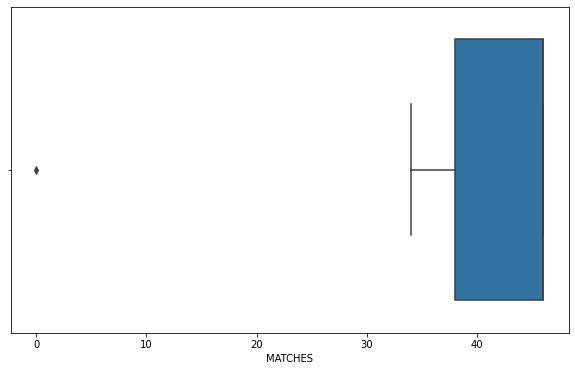

In [41]:
sns.boxplot(result_england.MATCHES)

In [42]:
result_england.MATCHES[result_england.MATCHES<20] = np.nan

In [43]:
result_england["MATCHES"].describe()
result_england.dropna(axis=0, how = 'any')


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38.0,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38.0,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38.0,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38.0,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38.0,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
283,Fleetwood Town,League One,2021-2022/,46.0,8,16,22,62/82,40,20
284,Gillingham,League One,2021-2022/,46.0,8,16,22,35/69,40,21
285,Doncaster Rovers,League One,2021-2022/,46.0,10,8,28,37/82,38,22
286,AFC Wimbledon,League One,2021-2022/,46.0,6,19,21,49/75,37,23


In [44]:
result_england.dropna(axis = 0, thresh=10, inplace = True)

In [45]:
result_Spain["MATCHES"].describe()

count    1549.000000
mean       36.020658
std         6.400064
min         0.000000
25%        38.000000
50%        38.000000
75%        38.000000
max        42.000000
Name: MATCHES, dtype: float64

<AxesSubplot:xlabel='MATCHES'>

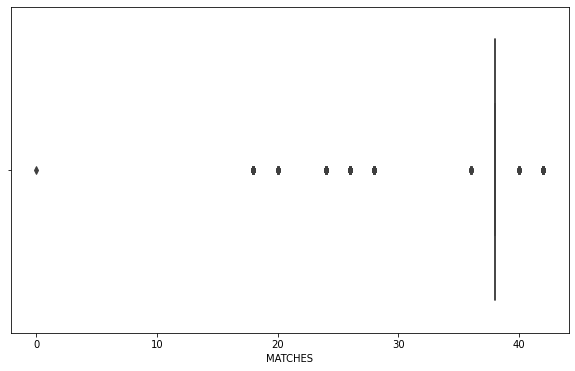

In [46]:
sns.boxplot(result_Spain.MATCHES)

In [47]:
result_Spain.MATCHES[result_Spain.MATCHES<20] = np.nan

In [48]:
result_Spain["MATCHES"].describe()
result_Spain.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Barcelona,La Liga,2010-2011/,38.0,30,6,2,95/21,96,1
1,Real Madrid,La Liga,2010-2011/,38.0,29,5,4,102/33,92,2
2,Valencia,La Liga,2010-2011/,38.0,21,8,9,64/44,71,3
3,Villarreal,La Liga,2010-2011/,38.0,18,8,12,54/44,62,4
4,Atletico Madrid,La Liga,2010-2011/,38.0,17,7,14,62/53,58,5
...,...,...,...,...,...,...,...,...,...,...
1040,UCAM Murcia,Second Division B,2021-2022/,38.0,8,11,19,42/56,35,18
1041,CD Tudelano,Second Division B,2021-2022/,38.0,7,7,24,33/54,28,19
1042,UE Llagostera,Second Division B,2021-2022/,38.0,6,15,17,26/51,33,19
1043,UD Extremadura,Second Division B,2021-2022/,38.0,5,5,28,22/80,0,20


In [49]:
result_Spain.dropna(axis = 0, thresh=10, inplace = True)

In [50]:
result_Spain["POINTS"].describe()

count    1468.000000
mean       50.174387
std        14.821854
min         0.000000
25%        41.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: POINTS, dtype: float64

<AxesSubplot:xlabel='POINTS'>

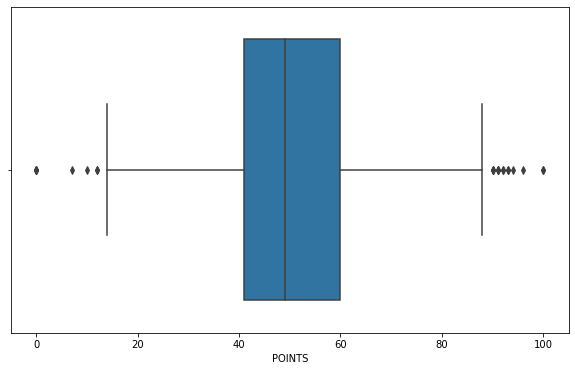

In [51]:
sns.boxplot(result_Spain.POINTS)

In [52]:
result_Spain.POINTS[result_Spain.POINTS<10] = np.nan

In [53]:
result_Spain["POINTS"].describe()
result_Spain.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Barcelona,La Liga,2010-2011/,38.0,30,6,2,95/21,96.0,1
1,Real Madrid,La Liga,2010-2011/,38.0,29,5,4,102/33,92.0,2
2,Valencia,La Liga,2010-2011/,38.0,21,8,9,64/44,71.0,3
3,Villarreal,La Liga,2010-2011/,38.0,18,8,12,54/44,62.0,4
4,Atletico Madrid,La Liga,2010-2011/,38.0,17,7,14,62/53,58.0,5
...,...,...,...,...,...,...,...,...,...,...
1039,Real Valladolid B,Second Division B,2021-2022/,38.0,9,9,20,42/64,36.0,18
1040,UCAM Murcia,Second Division B,2021-2022/,38.0,8,11,19,42/56,35.0,18
1041,CD Tudelano,Second Division B,2021-2022/,38.0,7,7,24,33/54,28.0,19
1042,UE Llagostera,Second Division B,2021-2022/,38.0,6,15,17,26/51,33.0,19


In [54]:
result_Spain.dropna(axis = 0, thresh=10, inplace = True)

In [55]:
result_Germany["MATCHES"].describe()

count    672.000000
mean      35.315476
std        2.312771
min        0.000000
25%       34.000000
50%       34.000000
75%       38.000000
max       38.000000
Name: MATCHES, dtype: float64

<AxesSubplot:xlabel='MATCHES'>

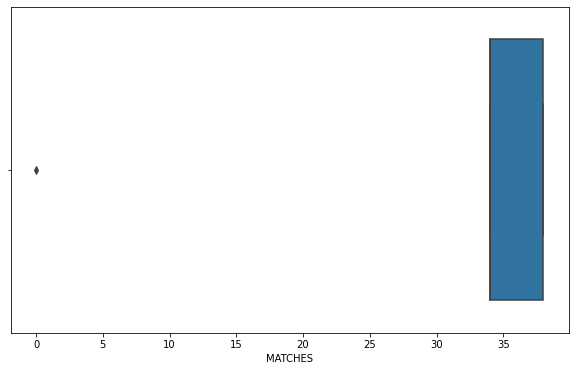

In [56]:
sns.boxplot(result_Germany.MATCHES)

In [57]:
result_Germany.POINTS[result_Germany.MATCHES<20] = np.nan

In [58]:
result_Germany["MATCHES"].describe()
result_Germany.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Borussia Dortmund,Bundesliga,2010-2011/,34,23,6,5,67/22,75.0,1
1,Bayer Leverkusen,Bundesliga,2010-2011/,34,20,8,6,64/44,68.0,2
2,FC Bayern,Bundesliga,2010-2011/,34,19,8,7,81/40,65.0,3
3,Hannover 96,Bundesliga,2010-2011/,34,19,3,12,49/45,60.0,4
4,Mainz 05,Bundesliga,2010-2011/,34,18,4,12,52/39,58.0,5
...,...,...,...,...,...,...,...,...,...,...
234,MSV Duisburg,3.Bundesliga,2021-2022/,36,13,3,20,46/71,42.0,15
235,SC Verl,3.Bundesliga,2021-2022/,36,10,10,16,56/66,40.0,16
236,FC Viktoria 1889 Berlin,3.Bundesliga,2021-2022/,36,10,7,19,44/62,37.0,17
237,FC Wurzburger Kickers,3.Bundesliga,2021-2022/,36,7,9,20,34/59,30.0,18


In [59]:
result_Germany.dropna(axis = 0, thresh=10, inplace = True)

In [60]:
result_Germany["POINTS"].describe()

count    671.000000
mean      48.178838
std       13.058453
min       13.000000
25%       40.000000
50%       47.000000
75%       55.500000
max       91.000000
Name: POINTS, dtype: float64

<AxesSubplot:xlabel='POINTS'>

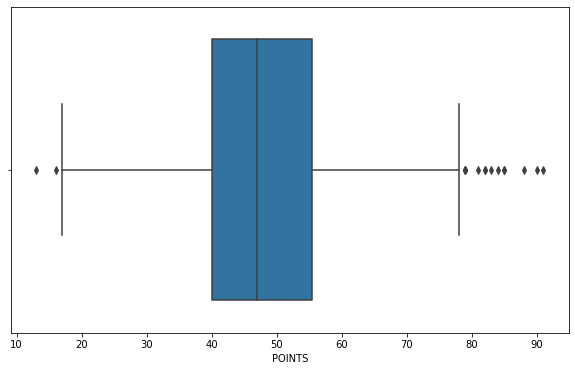

In [61]:
sns.boxplot(result_Germany.POINTS)

In [62]:
result_Germany.POINTS[result_Germany.POINTS<20] = np.nan

In [63]:
result_Germany["POINTS"].describe()

count    665.000000
mean      48.460150
std       12.773466
min       20.000000
25%       40.000000
50%       47.000000
75%       56.000000
max       91.000000
Name: POINTS, dtype: float64

In [64]:
result_Germany.dropna(axis = 0, thresh=10, inplace = True)

In [65]:
result_Italy["MATCHES"].describe()

count    3144.000000
mean       34.717239
std         5.399403
min         0.000000
25%        34.000000
50%        34.000000
75%        38.000000
max        42.000000
Name: MATCHES, dtype: float64

<AxesSubplot:xlabel='MATCHES'>

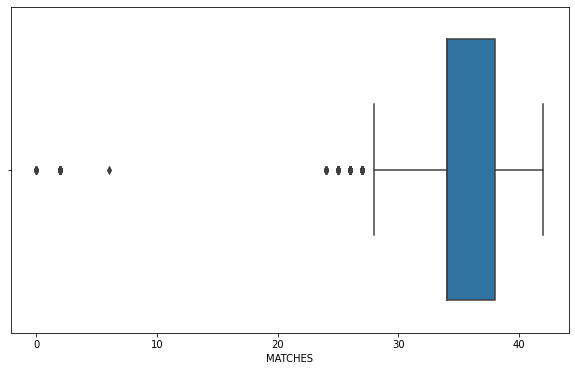

In [66]:
sns.boxplot(result_Italy.MATCHES)

In [67]:
result_Italy.MATCHES[result_Italy.MATCHES<20] = np.nan

In [68]:
result_Italy["MATCHES"].describe()
result_Italy.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,AC Milan,Serie A,2010-2011/,38.0,24,10,4,65/24,82,1
1,Inter Milan,Serie A,2010-2011/,38.0,23,7,8,69/42,76,2
2,Napoli,Serie A,2010-2011/,38.0,21,7,10,59/39,70,3
3,Udinese,Serie A,2010-2011/,38.0,20,6,12,65/43,66,4
4,Lazio,Serie A,2010-2011/,38.0,20,6,12,55/39,66,5
...,...,...,...,...,...,...,...,...,...,...
2023,Lavagnese,Serie D,2021-2022/,38.0,7,9,22,30/62,30,19
2025,Saluzzo,Serie D,2021-2022/,38.0,3,9,26,20/59,18,20
2026,Leon,Serie D,2021-2022/,38.0,8,9,21,50/88,33,20
2027,SS Tritium,Serie D,2021-2022/,38.0,7,14,17,38/65,35,20


In [69]:
result_Italy.dropna(axis = 0, thresh=10, inplace = True)

In [70]:
result_Italy["POINTS"].describe()

count    3095.000000
mean       47.604523
std        15.164685
min         0.000000
25%        38.000000
50%        46.000000
75%        57.000000
max       102.000000
Name: POINTS, dtype: float64

<AxesSubplot:xlabel='POINTS'>

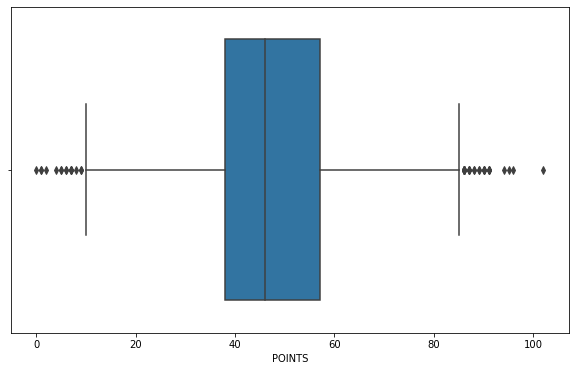

In [71]:
sns.boxplot(result_Italy.POINTS)

In [72]:
result_Italy.POINTS[result_Italy.POINTS<10] = np.nan

In [73]:
result_Italy["POINTS"].describe()
result_Italy.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,AC Milan,Serie A,2010-2011/,38.0,24,10,4,65/24,82.0,1
1,Inter Milan,Serie A,2010-2011/,38.0,23,7,8,69/42,76.0,2
2,Napoli,Serie A,2010-2011/,38.0,21,7,10,59/39,70.0,3
3,Udinese,Serie A,2010-2011/,38.0,20,6,12,65/43,66.0,4
4,Lazio,Serie A,2010-2011/,38.0,20,6,12,55/39,66.0,5
...,...,...,...,...,...,...,...,...,...,...
2023,Lavagnese,Serie D,2021-2022/,38.0,7,9,22,30/62,30.0,19
2025,Saluzzo,Serie D,2021-2022/,38.0,3,9,26,20/59,18.0,20
2026,Leon,Serie D,2021-2022/,38.0,8,9,21,50/88,33.0,20
2027,SS Tritium,Serie D,2021-2022/,38.0,7,14,17,38/65,35.0,20


In [74]:
result_Italy.dropna(axis = 0, thresh=10, inplace = True)

In [75]:
result_France["MATCHES"].describe()

count    704.000000
mean      36.181818
std        3.858583
min        0.000000
25%       34.000000
50%       38.000000
75%       38.000000
max       40.000000
Name: MATCHES, dtype: float64

<AxesSubplot:xlabel='MATCHES'>

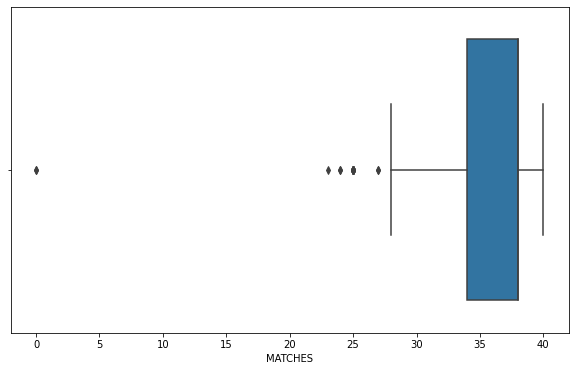

In [76]:
sns.boxplot(result_France.MATCHES)

In [77]:
result_France.MATCHES[result_France.MATCHES<20] = np.nan

In [78]:
result_France["MATCHES"].describe()
result_France.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Lille,Ligue 1,2010-2011/,38.0,21,13,4,68/36,76,1
1,Olympique Marseille,Ligue 1,2010-2011/,38.0,18,14,6,62/39,68,2
2,Olympique Lyonnais,Ligue 1,2010-2011/,38.0,17,13,8,61/40,64,3
3,PSG,Ligue 1,2010-2011/,38.0,15,15,8,56/41,60,4
4,Sochaux,Ligue 1,2010-2011/,38.0,17,7,14,60/43,58,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34.0,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34.0,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34.0,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34.0,6,9,19,28/48,26,17


In [79]:
result_France.dropna(axis = 0, thresh=10, inplace = True)

In [80]:
result.describe(include = 'all')
result["MATCHES"].describe()



count    6885.000000
mean       36.232825
std         5.801903
min         0.000000
25%        34.000000
50%        38.000000
75%        38.000000
max        46.000000
Name: MATCHES, dtype: float64

In [81]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6885 entries, 0 to 223
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TEAM       6885 non-null   object
 1   League     6885 non-null   object
 2   Year       6885 non-null   object
 3   MATCHES    6885 non-null   int32 
 4   WINS       6885 non-null   int32 
 5   DRWA       6885 non-null   int32 
 6   LOSE       6885 non-null   int32 
 7   GOAL HOST  6885 non-null   object
 8   POINTS     6885 non-null   int32 
 9   RANK       6885 non-null   int32 
dtypes: int32(6), object(4)
memory usage: 430.3+ KB


<AxesSubplot:xlabel='MATCHES'>

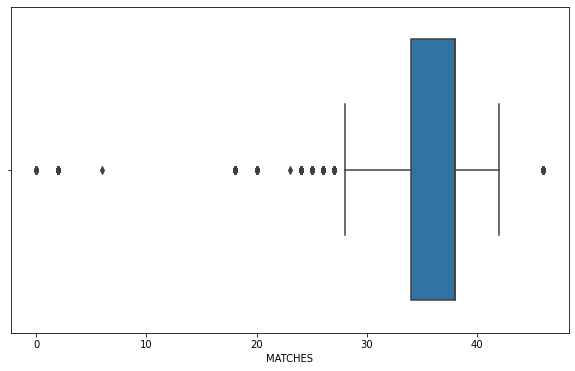

In [82]:
sns.boxplot(result.MATCHES)

In [83]:
result.MATCHES[result.MATCHES<20] = np.nan

In [84]:
result["MATCHES"].describe()
result.dropna(axis=0, how = 'any')

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38.0,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38.0,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38.0,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38.0,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38.0,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34.0,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34.0,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34.0,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34.0,6,9,19,28/48,26,17


In [85]:
result.dropna(axis = 0, thresh=10, inplace = True)

In [86]:
result

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38.0,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38.0,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38.0,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38.0,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38.0,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34.0,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34.0,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34.0,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34.0,6,9,19,28/48,26,17


# EDA & Visualization


### We will see the distribution of data between the victories and its position in the table

<AxesSubplot:xlabel='RANK', ylabel='LOSE'>

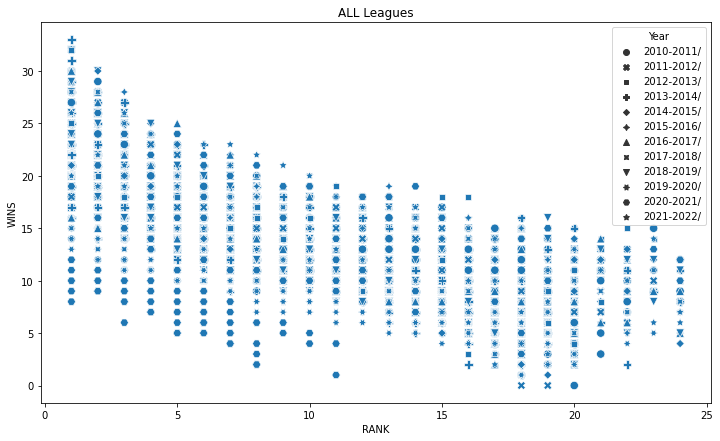

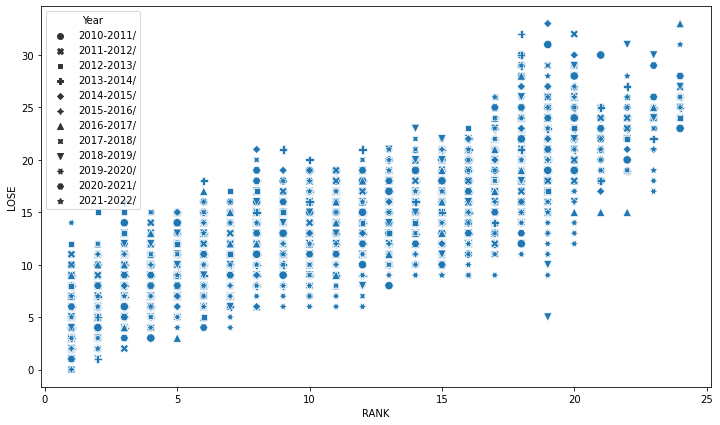

In [87]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(x = 'RANK', y = 'WINS', s = 70, style = 'Year', data = result)
plt.title('ALL Leagues')
fig = plt.figure(figsize = (12,7))
sns.scatterplot(x = 'RANK', y = 'LOSE', s = 70, style = 'Year', data = result)

## Now we will see the differnts between the top 10 teams win and lose in each differnts country

In [88]:
print(result_england.iloc[0:10,4:5].mean())
print(result_Spain.iloc[0:10,4:5].mean())
print(result_Italy.iloc[0:10,4:5].mean())
print(result_Germany.iloc[0:10,4:5].mean())
print(result_France.iloc[0:10,4:5].mean())

WINS    16.5
dtype: float64
WINS    18.9
dtype: float64
WINS    18.4
dtype: float64
WINS    16.3
dtype: float64
WINS    15.1
dtype: float64


<AxesSubplot:title={'center':'wins Scored by leagues'}, ylabel='wins'>

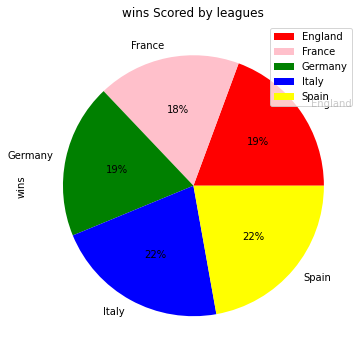

In [89]:
Most_Wins =  pd.DataFrame({'team': ['England', 'Spain', 'Italy', 'Germany','France'],
                   'wins': [16.5 ,18.9, 18.4, 16.3,15.1]}) 

Most_Wins.groupby(['team']).sum().plot(kind='pie', y='wins', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'green','blue','yellow'],
                                title='wins Scored by leagues')

In [90]:
print(result_england.iloc[0:10,6:7].mean())
print(result_Spain.iloc[0:10,6:7].mean())
print(result_Italy.iloc[0:10,6:7].mean())
print(result_Germany.iloc[0:10,6:7].mean())
print(result_France.iloc[0:10,6:7].mean())

LOSE    10.2
dtype: float64
LOSE    12.0
dtype: float64
LOSE    10.9
dtype: float64
LOSE    11.4
dtype: float64
LOSE    10.1
dtype: float64


<AxesSubplot:title={'center':'lose Scored by leagues'}, ylabel='wins'>

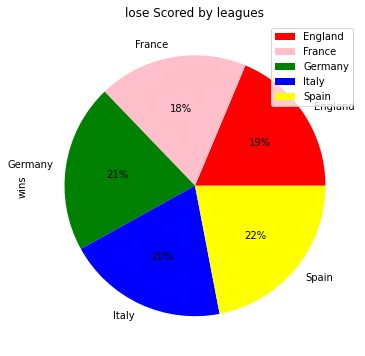

In [91]:
Most_Lose =  pd.DataFrame({'team': ['England', 'Spain', 'Italy', 'Germany','France'],
                   'wins': [10.2 ,12.0, 10.9, 11.4,10.1]}) 

Most_Lose.groupby(['team']).sum().plot(kind='pie', y='wins', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'green','blue','yellow'],
                                title='lose Scored by leagues')



## Now we will take top 5 in england and spain and see the differnt between the team in england and spain 

In [92]:
result_england.iloc[180:185,:7]


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE
180,Liverpool,Premier League,2019-2020/,38.0,32,3,3
181,Manchester City,Premier League,2019-2020/,38.0,26,3,9
182,Manchester United,Premier League,2019-2020/,38.0,18,12,8
183,Chelsea,Premier League,2019-2020/,38.0,20,6,12
184,Leicester City,Premier League,2019-2020/,38.0,18,8,12


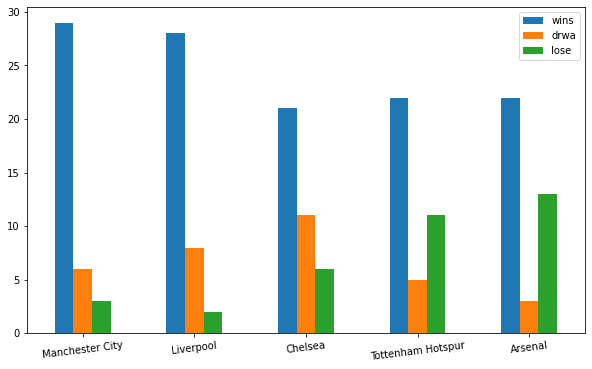

In [93]:
wins = [29,28, 21, 22, 22]
drwa=[6,8,11,5,3]
lose = [3, 2, 6, 11, 13]
index = ['Manchester City', 'Liverpool', 'Chelsea','Tottenham Hotspur','Arsenal']
        
df_winse = pd.DataFrame({'wins': wins,'drwa':drwa,
                   'lose': lose}, index=index)
ax = df_winse.plot.bar(rot=7)

In [94]:
result_Spain.iloc[180:185,:7]


,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE
180,Real Madrid,La Liga,2019-2020/,38.0,26,9,3
181,Barcelona,La Liga,2019-2020/,38.0,25,7,6
182,Atletico Madrid,La Liga,2019-2020/,38.0,18,16,4
183,Sevilla,La Liga,2019-2020/,38.0,19,13,6
184,Villarreal,La Liga,2019-2020/,38.0,18,6,14


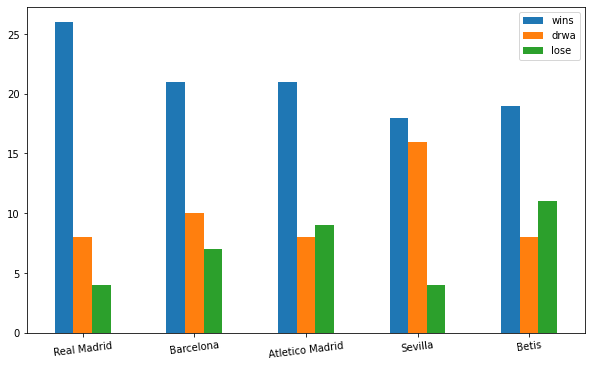

In [95]:
wins = [26,21, 21,18,19]
drwa=[8,10,8,16,8]
lose = [4, 7,9, 4, 11]
index = ['Real Madrid', 'Barcelona', 'Atletico Madrid','Sevilla','Betis']
        
df_winss = pd.DataFrame({'wins': wins,'drwa':drwa,
                   'lose': lose}, index=index)
ax = df_winss.plot.bar(rot=7)

# Machine Learning


### Now we will do a Machine Learning on the big data(all 5 leages together)

In [96]:
result

,TEAM,League,Year,MATCHES,WINS,DRWA,LOSE,GOAL HOST,POINTS,RANK
0,Manchester United,Premier League,2010-2011/,38.0,23,11,4,78/37,80,1
1,Chelsea,Premier League,2010-2011/,38.0,21,8,9,69/33,71,2
2,Manchester City,Premier League,2010-2011/,38.0,21,8,9,60/33,71,3
3,Arsenal,Premier League,2010-2011/,38.0,19,11,8,72/43,68,4
4,Tottenham Hotspur,Premier League,2010-2011/,38.0,16,14,8,55/46,62,5
...,...,...,...,...,...,...,...,...,...,...
219,Sete 34 FC,France. National,2021-2022/,34.0,10,7,17,35/42,37,14
220,FC Bastia Borgo,France. National,2021-2022/,34.0,7,10,17,40/58,31,15
221,Chambly,France. National,2021-2022/,34.0,7,8,19,35/62,29,16
222,US Boulogne,France. National,2021-2022/,34.0,6,9,19,28/48,26,17


In [97]:
result.to_excel("ALL_Leagues.xlsx")

## We will remove the categorical values and save the numeric values

In [98]:
TEAM = result["TEAM"]
League = result["League"]
Year = result["Year"]
GOAL_HOST = result["GOAL HOST"]

result = result.drop(["TEAM", "League", "Year", "GOAL HOST"],axis = 1)
    


## After we did deletion, we are starting the machine learning process

In [99]:
result    


,MATCHES,WINS,DRWA,LOSE,POINTS,RANK
0,38.0,23,11,4,80,1
1,38.0,21,8,9,71,2
2,38.0,21,8,9,71,3
3,38.0,19,11,8,68,4
4,38.0,16,14,8,62,5
...,...,...,...,...,...,...
219,34.0,10,7,17,37,14
220,34.0,7,10,17,31,15
221,34.0,7,8,19,29,16
222,34.0,6,9,19,26,17



## We will examine what variable has the highest impact on rank

In [100]:
result.corr()

,MATCHES,WINS,DRWA,LOSE,POINTS,RANK
MATCHES,1.000000,0.324147,0.373214,0.325650,0.399613,0.168770
WINS,0.324147,1.000000,-0.143802,-0.622047,0.975333,-0.783991
DRWA,0.373214,-0.143802,1.000000,-0.149581,0.063484,0.120655
LOSE,0.325650,-0.622047,-0.149581,1.000000,-0.659849,0.855264
POINTS,0.399613,0.975333,0.063484,-0.659849,1.000000,-0.768746
RANK,0.168770,-0.783991,0.120655,0.855264,-0.768746,1.000000


## Split dataset to train and test

In [101]:
def split_dataset_X_Y(df, target_column):
    y=df[target_column]
    X=df.drop([target_column],axis=1)
    return X,y

X,y=split_dataset_X_Y(result,"RANK")

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [103]:
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #6751
Number of training samples: #5400
Number of test samples: #1351


## Scale features - Standard scaler

In [104]:
scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)
X_train_scaled

,MATCHES,WINS,DRWA,LOSE,POINTS
912,0.285471,0.945828,-1.044110,-0.043692,0.739789
74,2.069668,2.315228,0.210216,-0.625768,2.372237
193,-0.160578,-1.206087,-0.730529,1.508511,-1.349744
1389,0.285471,1.141457,1.150960,-1.595894,1.392768
2,1.177570,0.945828,1.778123,-1.013818,1.327470
...,...,...,...,...,...
695,0.285471,-0.619201,1.464542,-0.043692,-0.304978
204,0.285471,0.554571,0.523797,-0.625768,0.674491
612,0.285471,-0.227944,0.210216,0.344359,-0.174382
1578,-2.613848,-0.814829,-0.416947,-1.207844,-0.892659


## We want to decide who is the best algorithm  to our machining, so for that we check 4 differnt algorithms  to see who give us the best prediction

In [105]:
GB_model=GradientBoostingRegressor(random_state=1)
RF_model=RandomForestRegressor(random_state=1)
LR_model=LinearRegression()

GB_model.fit(X,y)
RF_model.fit(X,y)
LR_model.fit(X,y)

VR_model=VotingRegressor([("gb",GB_model),("rf",RF_model),("lr",LR_model)])
VR_model.fit(X,y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [106]:
def predict(classifier, X_test, y_test):
    y_pred=classifier.predict(X_test)
    resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    return y_pred,resDF

In [107]:
y_pred1,df_res1 = predict(GB_model, X_test, y_test)
y_pred2,df_res2 = predict(RF_model, X_test, y_test)
y_pred3,df_res3 = predict(LR_model, X_test, y_test)
y_pred4,df_res4 = predict(VR_model, X_test, y_test)

## Let's look at the prediction of the rank we got from the algorithms we ran compared to the real rank

In [108]:
Pred_df=df_res1.copy()
Pred_df.rename(columns = {'Predicted':'GB'},inplace = True)
Pred_df['RF']=df_res2['Predicted']
Pred_df['LR']=df_res3['Predicted']
Pred_df['VR']=df_res4['Predicted']
Pred_df

,Actual,GB,RF,LR,VR
782,16,14.919561,16.448500,11.626327,14.331463
594,12,13.788487,13.687034,13.121513,13.532345
224,8,9.180905,8.366088,10.148604,9.231866
86,7,7.001713,7.514722,8.481057,7.665831
593,9,10.275269,9.757560,10.492876,10.175235
...,...,...,...,...,...
125,6,4.809372,4.749925,6.040661,5.199986
190,11,12.399197,13.033881,9.793219,11.742099
128,9,10.451351,10.117906,10.930982,10.500080
645,16,17.039486,16.410833,18.447953,17.299424


## We will check the errors of the algorithms we ran, using the Least Squares method

In [109]:
Mean_Squared_Error=[]
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['GB'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['RF'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['LR'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['VR'],squared=False)))

methods=['GB','RF','LR','VR']
Mean_Squared_Error=pd.DataFrame({'Method':methods,'Mean_Squared_Error':Mean_Squared_Error})
Mean_Squared_Error

,Method,Mean_Squared_Error
0,GB,1.215323
1,RF,1.101534
2,LR,1.473135
3,VR,1.206806


<AxesSubplot:xlabel='Method'>

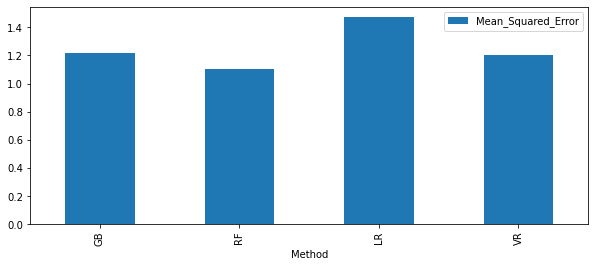

In [110]:
Mean_Squared_Error.plot.bar(x='Method',y='Mean_Squared_Error',figsize=(10,4))

## We will run all the algorithms and see the evaluation of all of them.

In [111]:
eval_res_1st = metrics.r2_score(y_test,Pred_df['GB'])
eval_res_2st = metrics.r2_score(y_test,Pred_df['RF'])
eval_res_3st = metrics.r2_score(y_test,Pred_df['LR'])
eval_res_4st = metrics.r2_score(y_test,Pred_df['VR'])
print("This is the Gradient Boosting Regressor Evaluation:",eval_res_1st)
print("This is the Random Forest Regressor Evaluation:",eval_res_2st)
print("This is the Linear Regression Evaluation:",eval_res_3st)
print("This is the Voting Regressor Evaluation:",eval_res_4st)

This is the Gradient Boosting Regressor Evaluation: 0.9333952157322738
This is the Random Forest Regressor Evaluation: 0.9550500148564804
This is the Linear Regression Evaluation: 0.8562164731638899
This is the Voting Regressor Evaluation: 0.9352427903196721


##  We can see the Random Forest Regression model has the best evaluation ( 95.50%) as we expected so we decide to choose it as our model.

In [112]:
df_res2

,Actual,Predicted
782,16,16.448500
594,12,13.687034
224,8,8.366088
86,7,7.514722
593,9,9.757560
...,...,...
125,6,4.749925
190,11,13.033881
128,9,10.117906
645,16,16.410833


## We will present the evaluation in the graph with the Least Squares method which shows the distances between the predicted rank and the original rank.

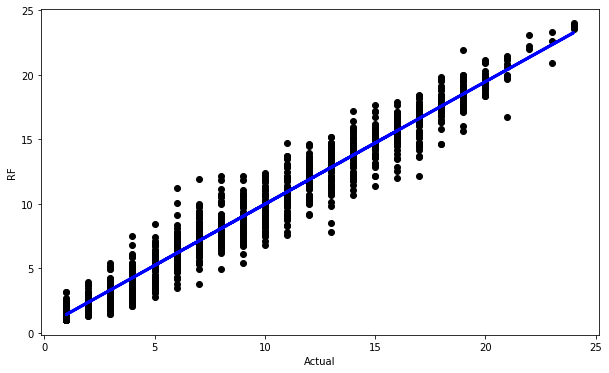

Slope: [[0.94933898]]
Intercept: [0.47709635]
R2: 0.9551241329090456


In [115]:
RANK_ALL = linear_model.LinearRegression()

x = df_res2['Actual'].values.reshape(df_res2['Actual'].shape[0],1)
y = Pred_df['RF'].values.reshape(Pred_df['RF'].shape[0],1)

RANK_ALL.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, RANK_ALL.predict(x), color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('RF')
plt.show()

print("Slope:",RANK_ALL.coef_)
print("Intercept:",RANK_ALL.intercept_)
print("R2:",RANK_ALL.score(x,y))